#  Video Game Sales




## Introduction

Gaming industry.....

![](https://media.cnn.com/api/v1/images/stellar/prod/i-stock-1287493837-1.jpg?c=16x9&q=w_800,c_fill)

# Dataset schema
| Variable       | Label                                   |
|:--------------:|:---------------------------------------------:|
| Rank           | Ranking of overall sales                      |
| Name           | The game's name                                |
| Platform       | Platform of the game's release (e.g., PC, PS4)|
| Year           | Year of the game's release                    |
| Genre          | Genre of the game                              |
| Publisher      | Publisher of the game                          |
| NA_Sales       | Sales in North America (in millions)          |
| EU_Sales       | Sales in Europe (in millions)                 |
| JP_Sales       | Sales in Japan (in millions)                  |
| Other_Sales    | Sales in the rest of the world (in millions)  |
| Global_Sales   | Total worldwide sales (in millions)           |

## Additional information

* This dataset contains a list of video games with sales greater than 100,000 copies. 

* The dataset covers from 1980 up until 2020. 
 
* The scraping was completed by Gregory Smith utilising Python's library - **BeautifulSoup**.

In [34]:
# Let's import the necessary libraries for data cleaning, analysis as well as visualizations.

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os 
from tabulate import tabulate

# Exploratory data analysis (EDA)

In [35]:
df = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")

In [36]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [37]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Let's check the NaN values and how we can deal with them

In [39]:
# There are 271 missing values for Year column and 58 are missing values for Publisher column.
print(df.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [40]:
# For the correct data analysis, let's leave only those rows that do not contain any NaN values.
df_cleaned = df.dropna()

In [41]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## Let's check for any 'threatining' outliers for the upcoming analysis. 

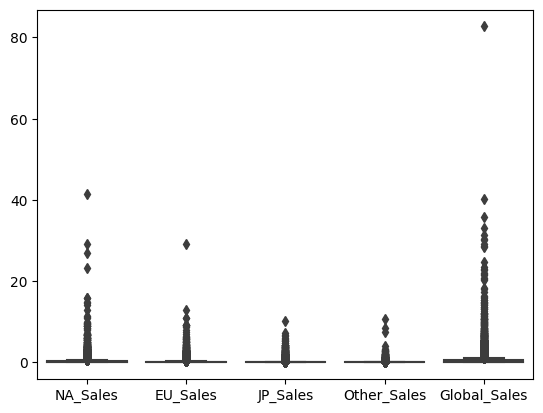

In [42]:
sns.boxplot(data=df_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])
plt.show()

# The boxplot indicates that all values fall fairly within a reasonable range.

In [43]:
count = df_cleaned['Year'].value_counts().sort_index(ascending=True)

count_table = pd.DataFrame({'Year': count.index, 'Count': count.values})

print(tabulate(count_table, headers='keys', tablefmt='pretty', showindex=False))

+--------+--------+
|  Year  | Count  |
+--------+--------+
| 1980.0 |  9.0   |
| 1981.0 |  46.0  |
| 1982.0 |  36.0  |
| 1983.0 |  17.0  |
| 1984.0 |  14.0  |
| 1985.0 |  14.0  |
| 1986.0 |  21.0  |
| 1987.0 |  16.0  |
| 1988.0 |  15.0  |
| 1989.0 |  17.0  |
| 1990.0 |  16.0  |
| 1991.0 |  41.0  |
| 1992.0 |  43.0  |
| 1993.0 |  60.0  |
| 1994.0 | 121.0  |
| 1995.0 | 219.0  |
| 1996.0 | 263.0  |
| 1997.0 | 289.0  |
| 1998.0 | 379.0  |
| 1999.0 | 338.0  |
| 2000.0 | 349.0  |
| 2001.0 | 482.0  |
| 2002.0 | 829.0  |
| 2003.0 | 775.0  |
| 2004.0 | 744.0  |
| 2005.0 | 936.0  |
| 2006.0 | 1008.0 |
| 2007.0 | 1201.0 |
| 2008.0 | 1428.0 |
| 2009.0 | 1431.0 |
| 2010.0 | 1257.0 |
| 2011.0 | 1136.0 |
| 2012.0 | 655.0  |
| 2013.0 | 546.0  |
| 2014.0 | 580.0  |
| 2015.0 | 614.0  |
| 2016.0 | 342.0  |
| 2017.0 |  3.0   |
| 2020.0 |  1.0   |
+--------+--------+


In [ ]:
# 2017 has only three occurrences, and 2020 has just one occurrence in the dataset. Consequently, these years can be omitted from the final analysis.

df_cleaned = df_cleaned[df_cleaned['Year'] < 2017]

In [58]:
# Let's check for the duplicates


df_cleaned = df_cleaned.drop_duplicates(subset=['Name', 'Platform'], keep='first')

df_cleaned.info()

# 3 values were dropped where the Name and the Platform is the same

<class 'pandas.core.frame.DataFrame'>
Index: 16284 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16284 non-null  int64  
 1   Name          16284 non-null  object 
 2   Platform      16284 non-null  object 
 3   Year          16284 non-null  float64
 4   Genre         16284 non-null  object 
 5   Publisher     16284 non-null  object 
 6   NA_Sales      16284 non-null  float64
 7   EU_Sales      16284 non-null  float64
 8   JP_Sales      16284 non-null  float64
 9   Other_Sales   16284 non-null  float64
 10  Global_Sales  16284 non-null  float64
 11  Top_Region    16284 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


# Data analysis

## 1. What are the top-selling games globally?
Identify the games with the highest global sales and analyze their characteristics (platform, genre, publisher, etc.).

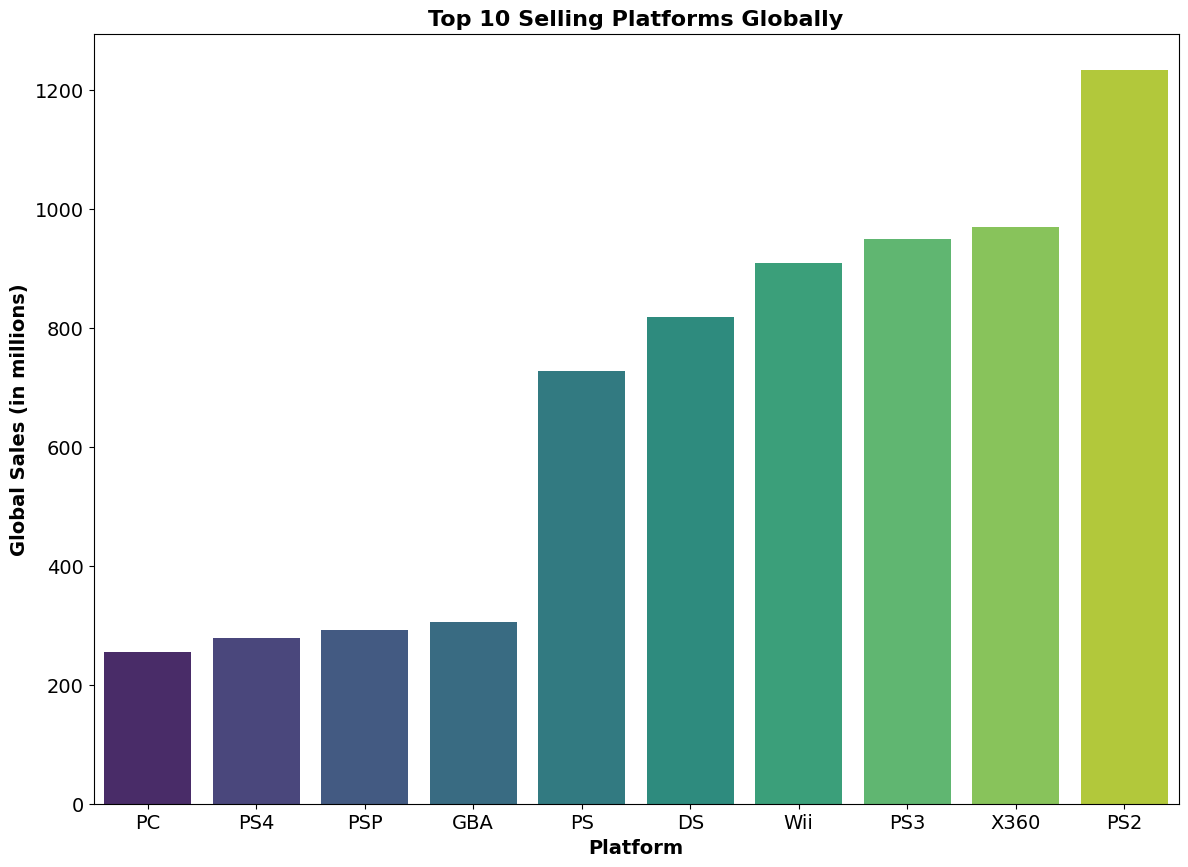

In [46]:
top_selling_platform = df_cleaned.groupby('Platform')['Global_Sales'].sum()
top_selling_platform = top_selling_platform.sort_values(ascending=False)
top_10_platforms = top_selling_platform.head(10)
top_10_platforms = top_10_platforms.sort_values(ascending=True)

plt.figure(figsize=(14, 10))
sns.barplot(x=top_10_platforms.index, y=top_10_platforms.values, palette="viridis")
plt.title('Top 10 Selling Platforms Globally', fontsize=16, fontweight='bold')
plt.xlabel('Platform', fontsize=14, fontweight='bold')
plt.ylabel('Global Sales (in millions)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.show()

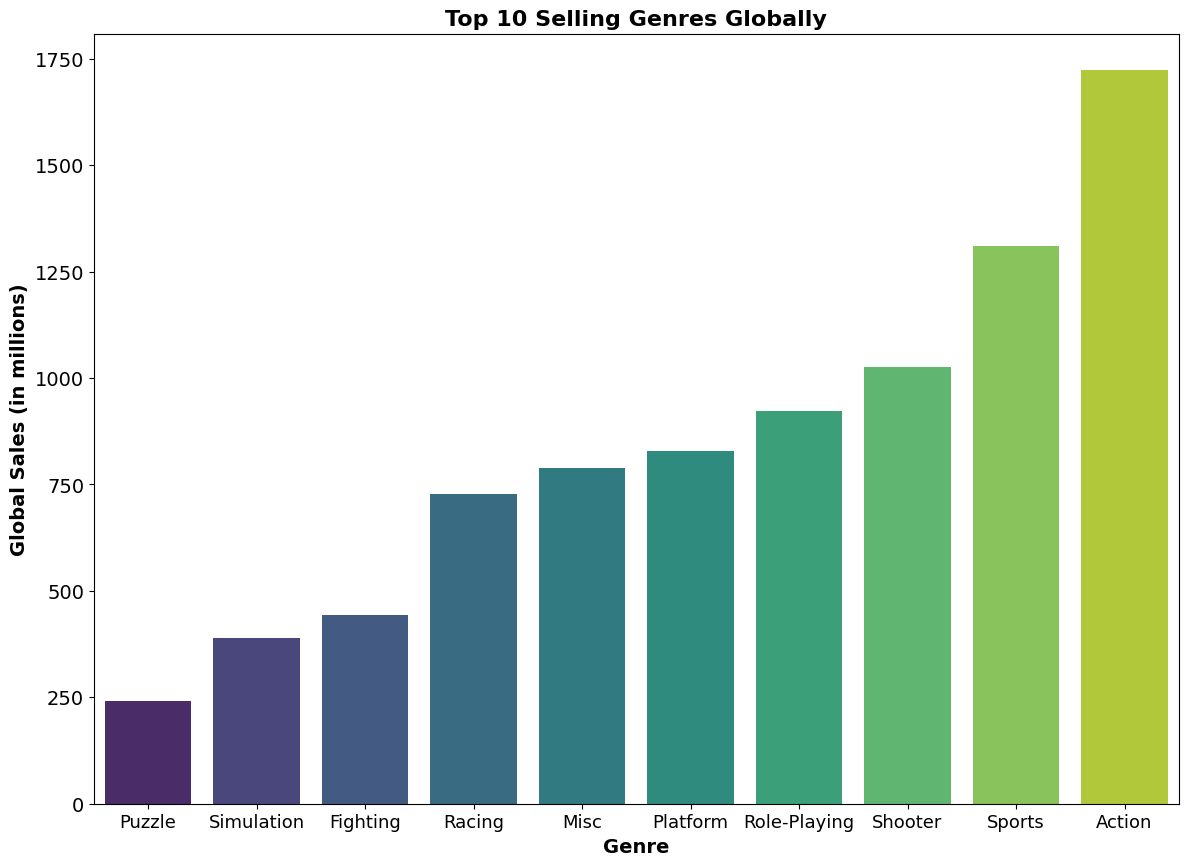

In [47]:
top_selling_genre = df_cleaned.groupby('Genre')['Global_Sales'].sum()
top_selling_genre = top_selling_genre.sort_values(ascending=False)
top_10_selling_genre = top_selling_genre.head(10)
top_10_selling_genre = top_10_selling_genre.sort_values(ascending=True)

plt.figure(figsize=(14, 10))
sns.barplot(x=top_10_selling_genre.index, y=top_10_selling_genre.values, palette="viridis")
plt.title('Top 10 Selling Genres Globally', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize = 14, fontweight='bold')
plt.ylabel('Global Sales (in millions)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=14)
plt.show()


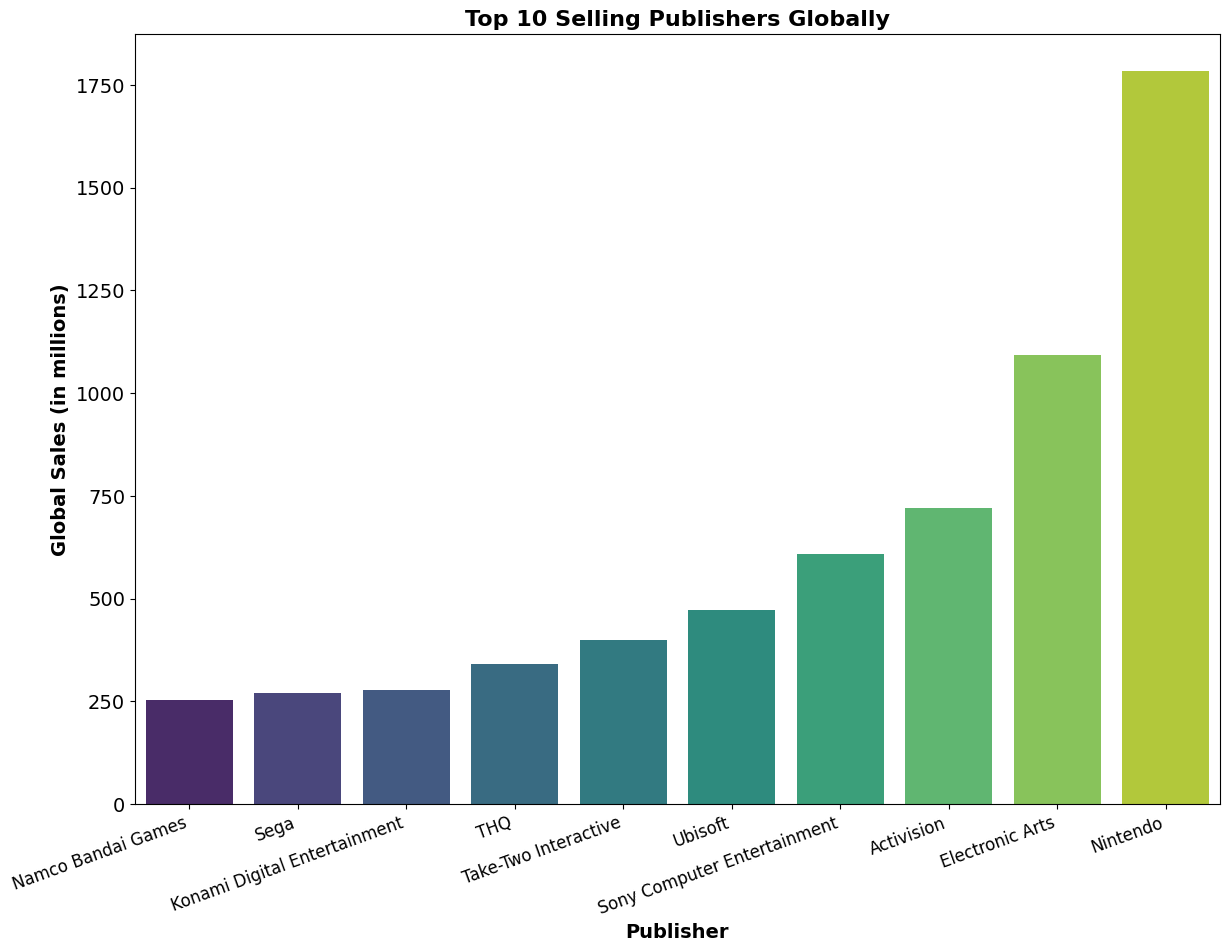

In [48]:
top_selling_publisher = df_cleaned.groupby('Publisher')['Global_Sales'].sum()
top_selling_publisher = top_selling_publisher.sort_values(ascending=False)
top_10_selling_publisher = top_selling_publisher.head(10)
top_10_selling_publisher = top_10_selling_publisher.sort_values(ascending=True)

plt.figure(figsize=(14, 10))
sns.barplot(x=top_10_selling_publisher.index, y=top_10_selling_publisher.values, palette="viridis")
plt.title('Top 10 Selling Publishers Globally', fontsize=16, fontweight='bold')
plt.xlabel('Publisher', fontsize = 14, fontweight='bold')
plt.ylabel('Global Sales (in millions)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, rotation=20, ha='right')
plt.yticks(fontsize=14)
plt.show()


## 2. Which platform has the highest average sales per game?
Evaluate the average sales per game for each platform to understand which platforms are more lucrative on average.

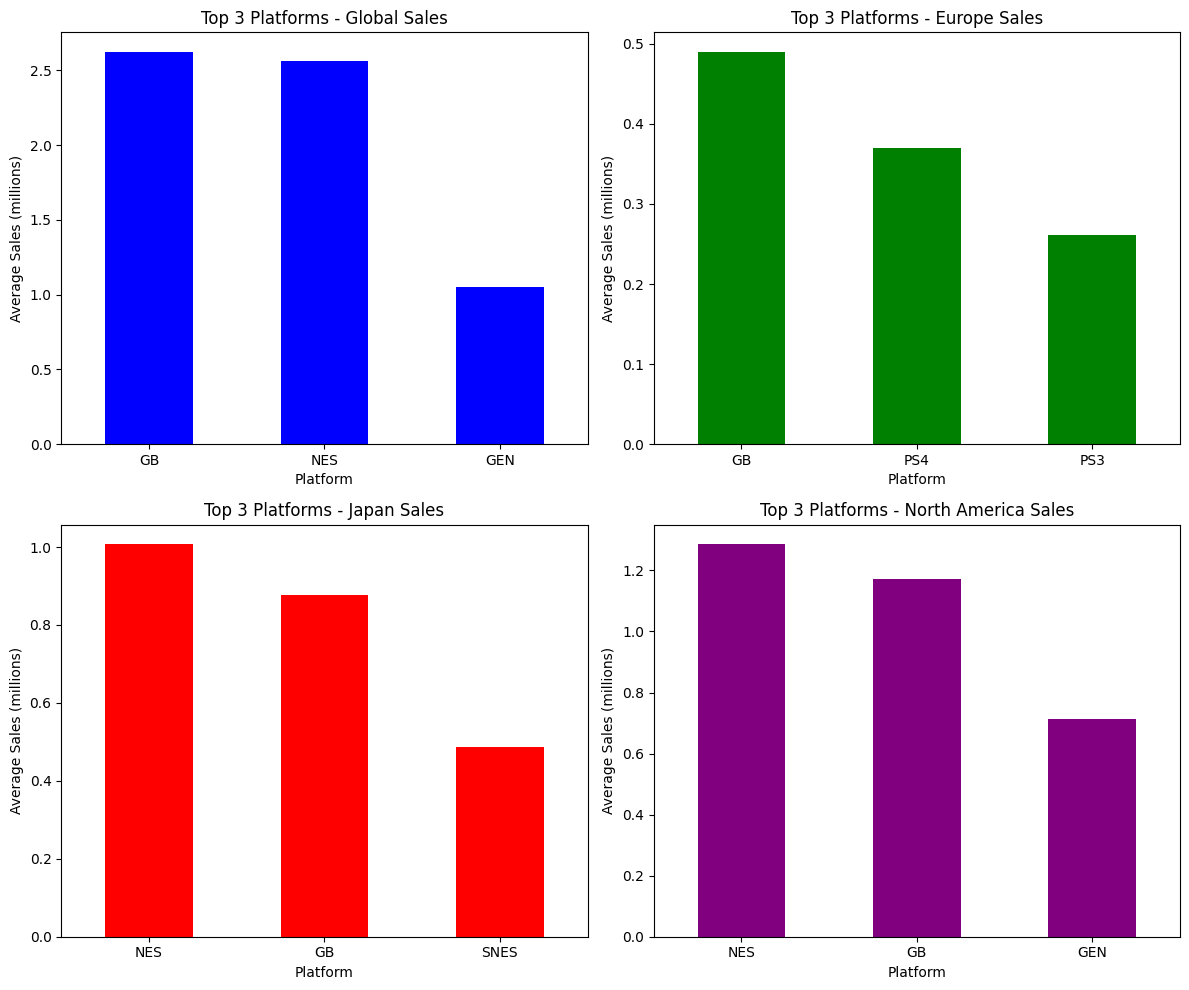

In [49]:
platform_avg_sales_globally = df_cleaned.groupby('Platform')['Global_Sales'].mean()
platform_avg_sales_globally = platform_avg_sales_globally.sort_values(ascending=False)
platform_avg_sales_globally = platform_avg_sales_globally.head(3)

platform_avg_sales_europe = df_cleaned.groupby('Platform')['EU_Sales'].mean()
platform_avg_sales_europe = platform_avg_sales_europe.sort_values(ascending=False)
platform_avg_sales_europe = platform_avg_sales_europe.head(3)

platform_avg_sales_japan = df_cleaned.groupby('Platform')['JP_Sales'].mean()
platform_avg_sales_japan = platform_avg_sales_japan.sort_values(ascending=False)
platform_avg_sales_japan = platform_avg_sales_japan.head(3)

platform_avg_sales_NA = df_cleaned.groupby('Platform')['NA_Sales'].mean()
platform_avg_sales_NA = platform_avg_sales_NA.sort_values(ascending=False)
platform_avg_sales_NA = platform_avg_sales_NA.head(3)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# 0 = top              # 0 = left
# 1 = bottom           # 1 = right

# Global sales
platform_avg_sales_globally.plot(kind='bar', ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Top 3 Platforms - Global Sales')
axes[0, 0].set_ylabel('Average Sales (millions)')
axes[0, 0].set_xlabel('Platform')


# Europe sales
platform_avg_sales_europe.plot(kind='bar', ax=axes[0, 1], color='green')
axes[0, 1].set_title('Top 3 Platforms - Europe Sales')
axes[0, 1].set_ylabel('Average Sales (millions)')
axes[0, 1].set_xlabel('Platform')


# Japan sales
platform_avg_sales_japan.plot(kind='bar', ax=axes[1, 0], color='red')
axes[1, 0].set_title('Top 3 Platforms - Japan Sales')
axes[1, 0].set_ylabel('Average Sales (millions)')
axes[1, 0].set_xlabel('Platform')


# North America sales
platform_avg_sales_NA.plot(kind='bar', ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Top 3 Platforms - North America Sales')
axes[1, 1].set_ylabel('Average Sales (millions)')
axes[1, 1].set_xlabel('Platform')

for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



## 3. How has the distribution of game genres evolved over the years?
Explore trends in game genres over different years to identify shifts in consumer preferences.


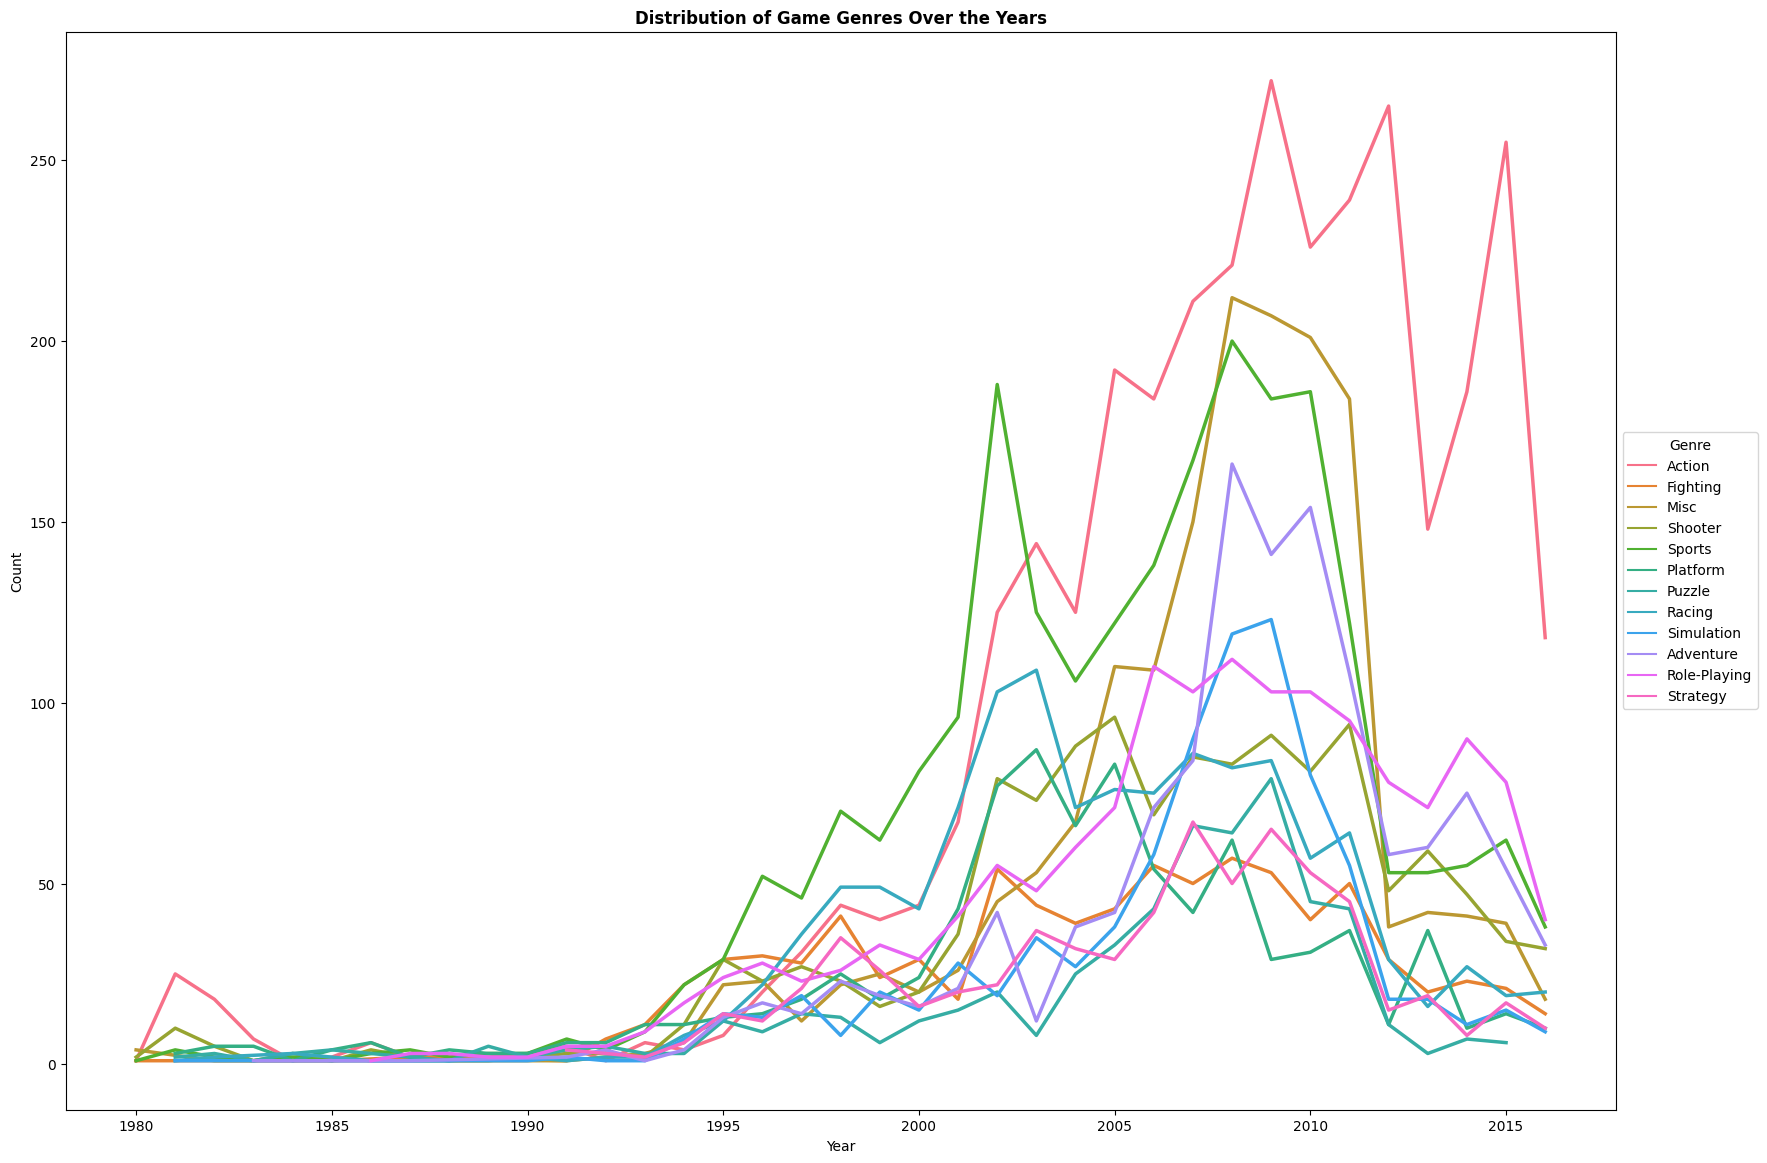

In [69]:
distribution_of_genres = df_cleaned.groupby(['Year', 'Genre']).size().reset_index(name='Count')


# Set a custom color palette
custom_palette = sns.color_palette("husl", n_colors=len(distribution_of_genres['Genre'].unique()))

# Increase the line thickness using linewidth
plt.figure(figsize=(20, 14))
sns.lineplot(x='Year', y='Count', hue='Genre', data=distribution_of_genres, linewidth=2.5, palette=custom_palette)

# Add a legend outside the plot for better readability
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Genre')

plt.title('Distribution of Game Genres Over the Years', fontweight='bold')
plt.show()


## 4. What is the correlation between sales in North America, Europe, Japan, and the rest of the world?
Investigate the relationships between sales in different regions to understand market dynamics.

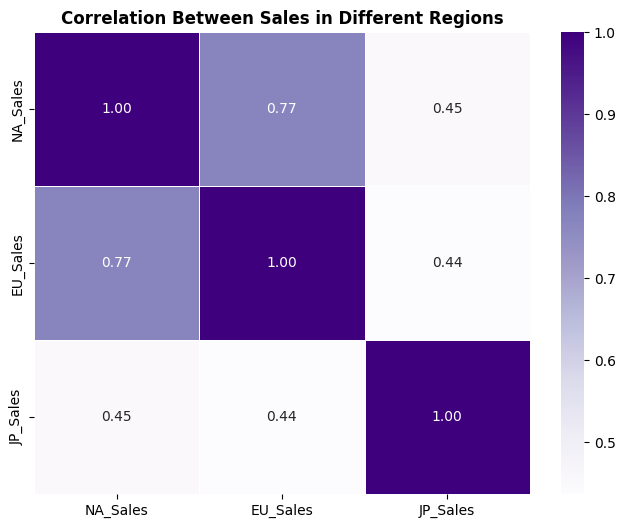

In [83]:
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales']

sales_correlation = df_cleaned[sales_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(sales_correlation, annot=True, cmap='Purples', fmt='.2f', linewidths=.5)
plt.title('Correlation Between Sales in Different Regions', fontweight='bold')
plt.show()

## 5. Are there specific genres that perform exceptionally well in certain regions?
Analyze regional sales data to identify genres that are particularly popular in specific parts of the world.

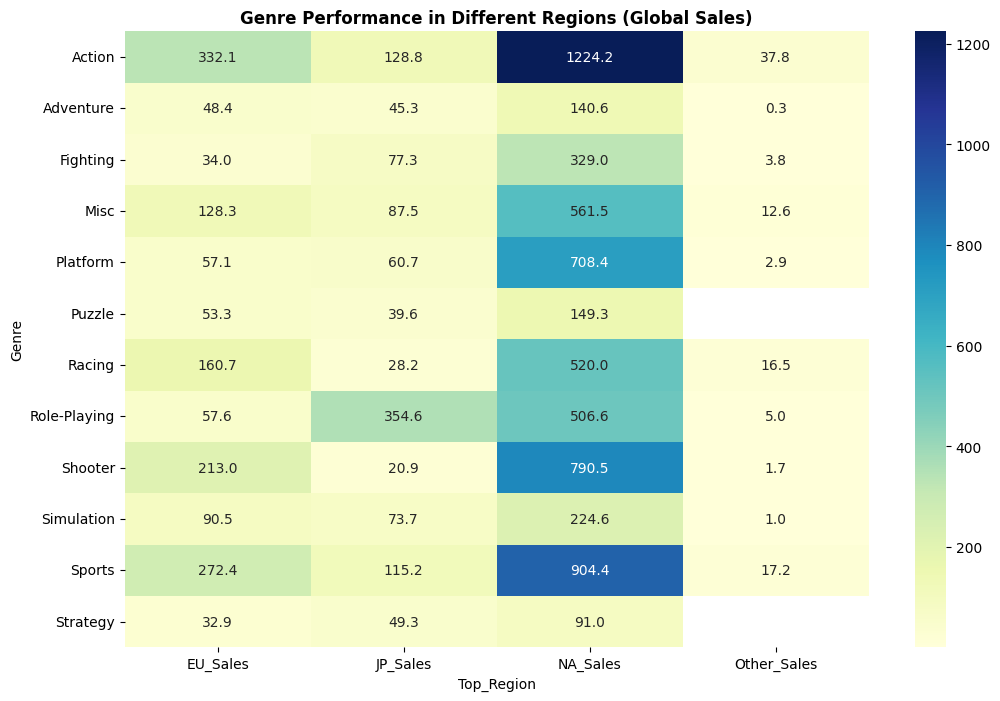

In [82]:
df_cleaned['Top_Region'] = df_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].idxmax(axis=1)


genre_region_sales = df_cleaned.groupby(['Genre', 'Top_Region']).agg({'Global_Sales': 'sum'}).reset_index()


# Create a heatmap to visualize genre performance in different regions
plt.figure(figsize=(12, 8))
sns.heatmap(genre_region_sales.pivot(index='Genre', columns='Top_Region', values='Global_Sales'), annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Genre Performance in Different Regions (Global Sales)', fontweight='bold')
plt.show()


## 6.1 Which year had the highest total global sales, and what games contributed to this peak?
Identify the year with the highest total sales and investigate the games that drove this peak.


In [73]:
year_highest_global_sales = df_cleaned.groupby('Year')['Global_Sales'].sum()
max_global_sales_year = year_highest_global_sales.idxmax()


df_max_global_sales_year = df_cleaned[df_cleaned['Year'] == max_global_sales_year]
df_max_global_sales_year = df_max_global_sales_year.head(3)


print(f"Year with the highest global sales: {max_global_sales_year}")
print("Games in the year with the highest global sales:")
print(df_max_global_sales_year[['Year', 'Name', 'Platform', 'Global_Sales']])


Year with the highest global sales: 2008.0
Games in the year with the highest global sales:
      Year                     Name Platform  Global_Sales
2   2008.0           Mario Kart Wii      Wii         35.82
39  2008.0  Super Smash Bros. Brawl      Wii         13.04
51  2008.0      Grand Theft Auto IV     X360         11.02


## 6.2 Top 3 games that drove the peak in 2008 in total global sales

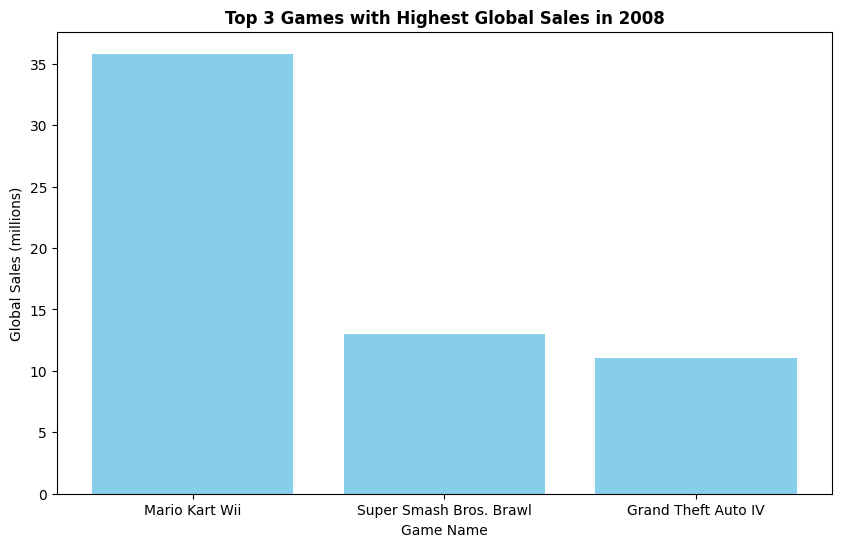

In [81]:
df_max_global_sales_year_sorted = df_max_global_sales_year.sort_values(by='Global_Sales', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_max_global_sales_year_sorted['Name'], df_max_global_sales_year_sorted['Global_Sales'], color='skyblue')
plt.xlabel('Game Name')
plt.ylabel('Global Sales (millions)')
plt.title(f'Top 3 Games with Highest Global Sales in 2008', fontweight='bold')
plt.show()

## 7. What is the market share of each platform in different regions?
Explore how different gaming platforms perform in North America, Europe, Japan, and other regions.

          NA_Sales  EU_Sales  JP_Sales  Other_Sales
Platform                                           
2600         80.78      4.86      0.00         0.84
3DO           0.00      0.00      0.10         0.00
3DS          78.03     58.29     97.30        12.55
DC            5.43      1.69      8.56         0.27
DS          388.26    194.05    175.02        60.27
GB          113.64     47.51     85.12         8.16
GBA         178.43     72.49     46.56         7.51
GC          131.94     38.32     21.34         5.13
GEN          19.27      5.52      2.67         0.89
GG            0.00      0.00      0.04         0.00
N64         138.91     41.03     33.76         4.31
NES         125.94     21.15     98.65         5.31
NG            0.00      0.00      1.44         0.00
PC           92.04    137.29      0.17        24.31
PCFX          0.00      0.00      0.03         0.00
PS          334.71    212.38    139.78        40.69
PS2         572.92    332.63    137.54       190.47
PS3         

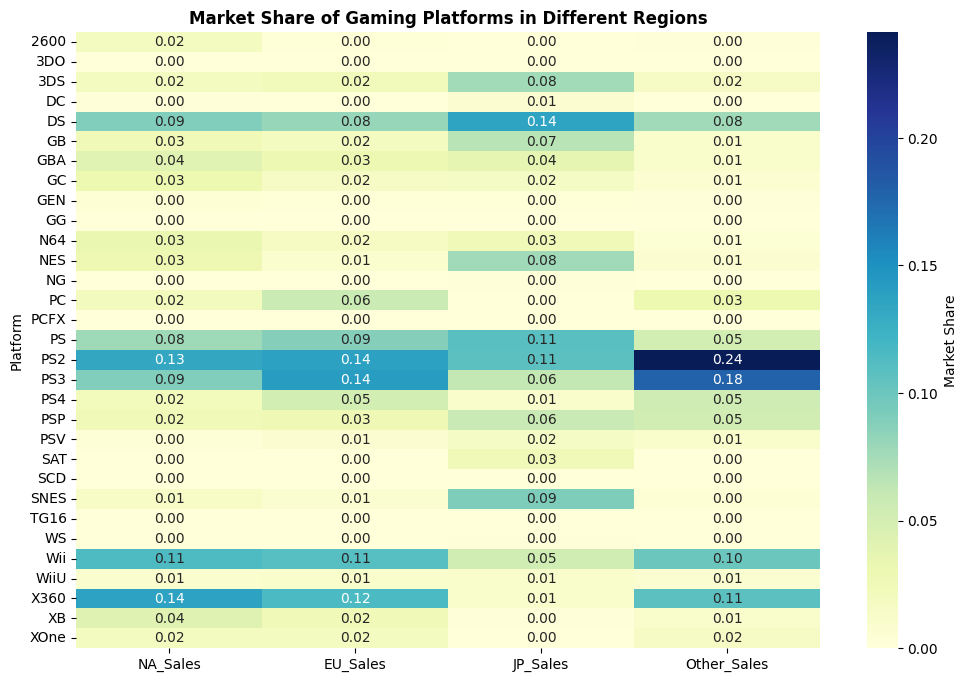

In [93]:
market_share = df_cleaned.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

print(market_share)


platform_region_market_share = market_share / market_share.sum(axis=0)


# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(platform_region_market_share, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Market Share'})
plt.title('Market Share of Gaming Platforms in Different Regions', fontweight='bold')
plt.show()


# Conclusion